## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.924411  0.764996 -0.508891  1.374062  0.844942  0.667963
1  0.570346 -0.578252  1.222206  0.798931 -0.179348  0.844952
2 -0.025404  0.196570 -0.122965  1.114882  0.755267  1.000903
3 -0.181008  1.794462  0.607005  1.471674 -1.528539  1.205676
4  0.921929 -0.889218  1.295846 -0.860654 -0.094903 -0.179626


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9654696	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9564584	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9473699	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9374951	total: 59.6ms	remaining: 14.8s
4:	learn: 0.9299790	total: 60ms	remaining: 11.9s
5:	learn: 0.9213611	total: 60.6ms	remaining: 10s
6:	learn: 0.9120360	total: 61.2ms	remaining: 8.69s
7:	learn: 0.9039671	total: 62ms	remaining: 7.69s
8:	learn: 0.8950124	total: 62.5ms	remaining: 6.88s
9:	learn: 0.8868197	total: 63.1ms	remaining: 6.25s
10:	learn: 0.8781174	total: 63.6ms	remaining: 5.72s
11:	learn: 0.8689524	total: 64ms	remaining: 5.27s
12:	learn: 0.8614799	total: 64.5ms	remaining: 4.89s
13:	learn: 0.8527989	total: 64.9ms	remaining: 4.57s
14:	learn: 0.8450778	total: 65.4ms	remaining: 4.29s
15:	learn: 0.8368390	total: 65.9ms	remaining: 4.05s
16:	learn: 0.8277687	total: 66.4ms	remaining: 3.84s
17:	learn: 0.8198721	total: 66.9ms	remaining: 3.65s
18:	learn: 0.8125847	total: 67.3ms	remaining: 3.47s


102:	learn: 0.3941024	total: 108ms	remaining: 940ms
103:	learn: 0.3913595	total: 109ms	remaining: 935ms
104:	learn: 0.3877993	total: 109ms	remaining: 929ms
105:	learn: 0.3851378	total: 109ms	remaining: 923ms
106:	learn: 0.3819067	total: 110ms	remaining: 916ms
107:	learn: 0.3784176	total: 110ms	remaining: 910ms
108:	learn: 0.3750800	total: 111ms	remaining: 904ms
109:	learn: 0.3723209	total: 111ms	remaining: 898ms
110:	learn: 0.3693413	total: 111ms	remaining: 892ms
111:	learn: 0.3659188	total: 112ms	remaining: 888ms
112:	learn: 0.3631790	total: 112ms	remaining: 882ms
113:	learn: 0.3603481	total: 113ms	remaining: 876ms
114:	learn: 0.3575370	total: 113ms	remaining: 871ms
115:	learn: 0.3544909	total: 114ms	remaining: 866ms
116:	learn: 0.3513248	total: 114ms	remaining: 861ms
117:	learn: 0.3487124	total: 114ms	remaining: 856ms
118:	learn: 0.3458793	total: 115ms	remaining: 851ms
119:	learn: 0.3430524	total: 115ms	remaining: 846ms
120:	learn: 0.3402874	total: 116ms	remaining: 841ms
121:	learn: 

266:	learn: 0.1149041	total: 186ms	remaining: 511ms
267:	learn: 0.1140324	total: 187ms	remaining: 510ms
268:	learn: 0.1132353	total: 187ms	remaining: 509ms
269:	learn: 0.1125107	total: 188ms	remaining: 507ms
270:	learn: 0.1116716	total: 188ms	remaining: 506ms
271:	learn: 0.1110027	total: 189ms	remaining: 505ms
272:	learn: 0.1103566	total: 189ms	remaining: 503ms
273:	learn: 0.1096813	total: 190ms	remaining: 502ms
274:	learn: 0.1090807	total: 190ms	remaining: 501ms
275:	learn: 0.1084862	total: 190ms	remaining: 499ms
276:	learn: 0.1076592	total: 191ms	remaining: 497ms
277:	learn: 0.1069438	total: 191ms	remaining: 496ms
278:	learn: 0.1062873	total: 191ms	remaining: 494ms
279:	learn: 0.1056108	total: 192ms	remaining: 493ms
280:	learn: 0.1049496	total: 192ms	remaining: 491ms
281:	learn: 0.1042784	total: 192ms	remaining: 490ms
282:	learn: 0.1034475	total: 193ms	remaining: 489ms
283:	learn: 0.1027598	total: 193ms	remaining: 488ms
284:	learn: 0.1021107	total: 194ms	remaining: 487ms
285:	learn: 

483:	learn: 0.0402878	total: 291ms	remaining: 310ms
484:	learn: 0.0400635	total: 292ms	remaining: 310ms
485:	learn: 0.0398934	total: 292ms	remaining: 309ms
486:	learn: 0.0397764	total: 293ms	remaining: 308ms
487:	learn: 0.0396697	total: 293ms	remaining: 307ms
488:	learn: 0.0395647	total: 293ms	remaining: 307ms
489:	learn: 0.0394345	total: 294ms	remaining: 306ms
490:	learn: 0.0392152	total: 294ms	remaining: 305ms
491:	learn: 0.0391130	total: 295ms	remaining: 304ms
492:	learn: 0.0390041	total: 295ms	remaining: 303ms
493:	learn: 0.0389605	total: 295ms	remaining: 302ms
494:	learn: 0.0387467	total: 296ms	remaining: 302ms
495:	learn: 0.0385751	total: 296ms	remaining: 301ms
496:	learn: 0.0385062	total: 296ms	remaining: 300ms
497:	learn: 0.0384010	total: 297ms	remaining: 299ms
498:	learn: 0.0383589	total: 297ms	remaining: 298ms
499:	learn: 0.0381407	total: 298ms	remaining: 298ms
500:	learn: 0.0379039	total: 298ms	remaining: 297ms
501:	learn: 0.0377390	total: 299ms	remaining: 296ms
502:	learn: 

653:	learn: 0.0197954	total: 369ms	remaining: 195ms
654:	learn: 0.0196977	total: 370ms	remaining: 195ms
655:	learn: 0.0195999	total: 370ms	remaining: 194ms
656:	learn: 0.0195023	total: 371ms	remaining: 193ms
657:	learn: 0.0194066	total: 371ms	remaining: 193ms
658:	learn: 0.0193055	total: 372ms	remaining: 192ms
659:	learn: 0.0192891	total: 372ms	remaining: 192ms
660:	learn: 0.0191901	total: 373ms	remaining: 191ms
661:	learn: 0.0191566	total: 373ms	remaining: 190ms
662:	learn: 0.0190555	total: 373ms	remaining: 190ms
663:	learn: 0.0190295	total: 374ms	remaining: 189ms
664:	learn: 0.0190041	total: 374ms	remaining: 189ms
665:	learn: 0.0189890	total: 375ms	remaining: 188ms
666:	learn: 0.0188897	total: 375ms	remaining: 187ms
667:	learn: 0.0188747	total: 376ms	remaining: 187ms
668:	learn: 0.0188599	total: 376ms	remaining: 186ms
669:	learn: 0.0187863	total: 377ms	remaining: 186ms
670:	learn: 0.0186888	total: 377ms	remaining: 185ms
671:	learn: 0.0186741	total: 378ms	remaining: 184ms
672:	learn: 

871:	learn: 0.0113263	total: 473ms	remaining: 69.5ms
872:	learn: 0.0112849	total: 474ms	remaining: 68.9ms
873:	learn: 0.0112377	total: 474ms	remaining: 68.4ms
874:	learn: 0.0112320	total: 475ms	remaining: 67.8ms
875:	learn: 0.0112263	total: 475ms	remaining: 67.3ms
876:	learn: 0.0112074	total: 476ms	remaining: 66.7ms
877:	learn: 0.0111612	total: 476ms	remaining: 66.2ms
878:	learn: 0.0111428	total: 477ms	remaining: 65.6ms
879:	learn: 0.0110976	total: 477ms	remaining: 65.1ms
880:	learn: 0.0110897	total: 478ms	remaining: 64.6ms
881:	learn: 0.0110703	total: 478ms	remaining: 64ms
882:	learn: 0.0110419	total: 479ms	remaining: 63.5ms
883:	learn: 0.0109978	total: 480ms	remaining: 62.9ms
884:	learn: 0.0109754	total: 480ms	remaining: 62.4ms
885:	learn: 0.0109564	total: 481ms	remaining: 61.8ms
886:	learn: 0.0109134	total: 481ms	remaining: 61.3ms
887:	learn: 0.0108885	total: 481ms	remaining: 60.7ms
888:	learn: 0.0108667	total: 482ms	remaining: 60.2ms
889:	learn: 0.0108453	total: 482ms	remaining: 59

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

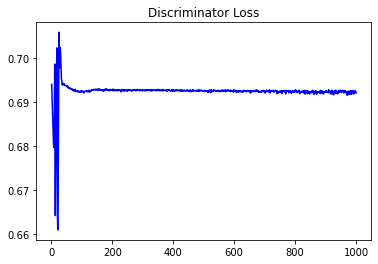

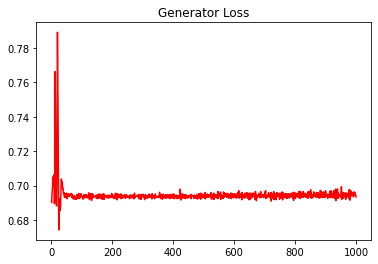

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2625940429636361


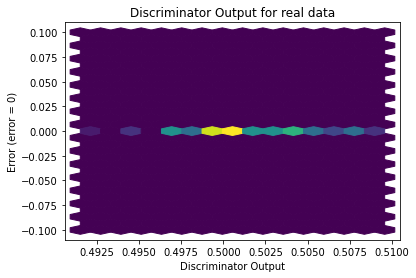

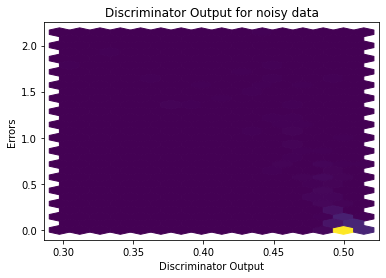

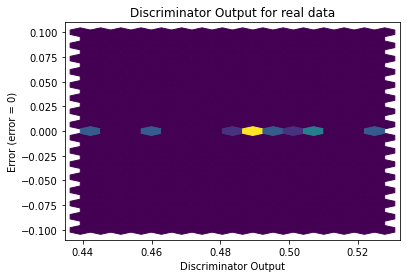

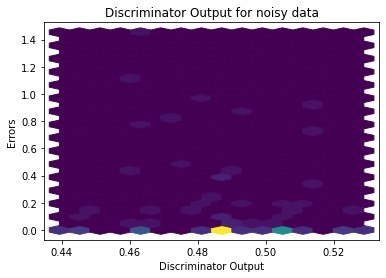

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


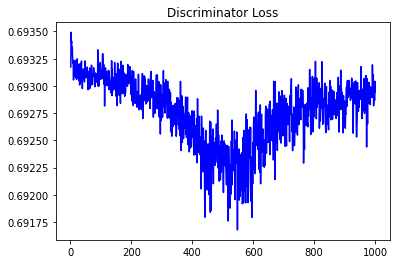

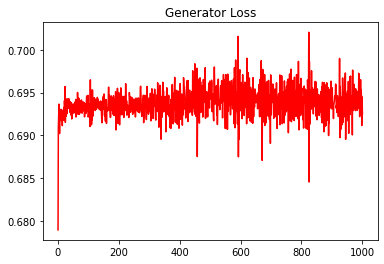

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1521549942097929


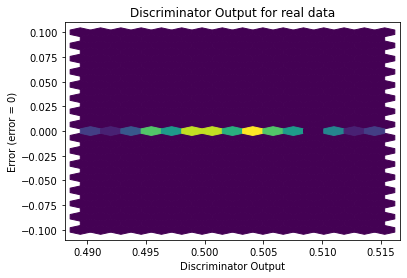

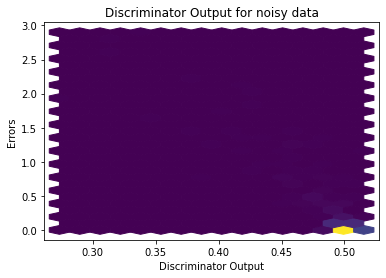

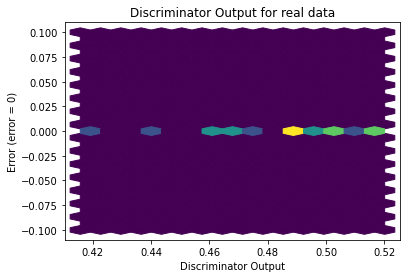

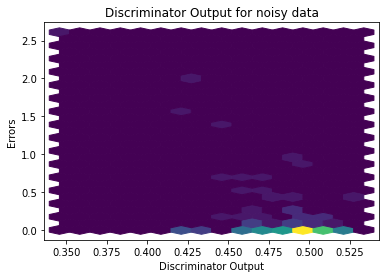

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2140]], requires_grad=True)
